In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
from glob import glob
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import chain

##Import any other packages you may need here

In [2]:
dataset_root = '/media/fanta/52A80B61A80B42C9/Users/fanta/datasets'

In [3]:
pd.set_option('display.max_rows', 100)

In [4]:
all_xray_df = pd.read_csv(dataset_root+'/data/Data_Entry_2017.csv')
all_xray_df = all_xray_df.drop(columns=all_xray_df.columns[-1])
all_xray_df.sample(10)

,Image Index,Finding Labels,Follow-up #,Patient ID,Patient Age,Patient Gender,View Position,OriginalImage[Width,Height],OriginalImagePixelSpacing[x,y]
65632,00016199_003.png,No Finding,3,16199,31,F,AP,2500,2048,0.168,0.168
87627,00021651_000.png,No Finding,0,21651,59,F,AP,3056,2544,0.139,0.139
58121,00014380_007.png,No Finding,7,14380,51,F,AP,2500,2048,0.168,0.168
33815,00008860_002.png,No Finding,2,8860,38,M,AP,2500,2048,0.168,0.168
103043,00027464_028.png,Cardiomegaly|Consolidation|Effusion,28,27464,34,F,AP,3056,2544,0.139,0.139
48152,00012200_001.png,Consolidation|Mass,1,12200,65,M,AP,2500,2048,0.168,0.168
68473,00016913_002.png,No Finding,2,16913,68,F,PA,2992,2991,0.143,0.143
94622,00024361_000.png,No Finding,0,24361,45,F,PA,2356,2549,0.143,0.143
65859,00016266_000.png,Fibrosis|Pneumothorax,0,16266,55,F,PA,2802,2789,0.143,0.143
63240,00015622_000.png,No Finding,0,15622,33,F,PA,2992,2991,0.143,0.143


In [5]:

all_image_paths = {os.path.basename(x): x for x in 
                   glob(os.path.join(dataset_root+'/data','images*', '*', '*.png'))}
print('Scans found:', len(all_image_paths), ', Total Headers', all_xray_df.shape[0])
all_xray_df['path'] = all_xray_df['Image Index'].map(all_image_paths.get)
all_xray_df.sample(10)

Scans found: 112120 , Total Headers 112120


,Image Index,Finding Labels,Follow-up #,Patient ID,Patient Age,Patient Gender,View Position,OriginalImage[Width,Height],OriginalImagePixelSpacing[x,y],path
99118,00026208_000.png,Infiltration,0,26208,48,F,PA,2992,2991,0.143000,0.143000,/media/fanta/52A80B61A80B42C9/Users/fanta/data...
44870,00011543_015.png,Effusion,15,11543,80,M,PA,2992,2991,0.143000,0.143000,/media/fanta/52A80B61A80B42C9/Users/fanta/data...
70713,00017436_002.png,No Finding,2,17436,68,M,AP,2500,2048,0.168000,0.168000,/media/fanta/52A80B61A80B42C9/Users/fanta/data...
60483,00014934_000.png,No Finding,0,14934,55,M,PA,2992,2991,0.143000,0.143000,/media/fanta/52A80B61A80B42C9/Users/fanta/data...
17515,00004726_000.png,No Finding,0,4726,48,F,PA,2048,2500,0.168000,0.168000,/media/fanta/52A80B61A80B42C9/Users/fanta/data...
101378,00026928_000.png,Infiltration,0,26928,69,F,AP,3056,2544,0.139000,0.139000,/media/fanta/52A80B61A80B42C9/Users/fanta/data...
41496,00010725_007.png,No Finding,7,10725,25,F,PA,2402,2649,0.143000,0.143000,/media/fanta/52A80B61A80B42C9/Users/fanta/data...
81796,00020122_001.png,Atelectasis,1,20122,55,M,AP,3056,2544,0.139000,0.139000,/media/fanta/52A80B61A80B42C9/Users/fanta/data...
87232,00021541_002.png,Infiltration,2,21541,64,M,PA,2021,2021,0.194311,0.194311,/media/fanta/52A80B61A80B42C9/Users/fanta/data...
102915,00027436_000.png,No Finding,0,27436,18,F,AP,2844,2460,0.139000,0.139000,/media/fanta/52A80B61A80B42C9/Users/fanta/data...


In [6]:
all_xray_df.columns

Index(['Image Index', 'Finding Labels', 'Follow-up #', 'Patient ID',
       'Patient Age', 'Patient Gender', 'View Position', 'OriginalImage[Width',
       'Height]', 'OriginalImagePixelSpacing[x', 'y]', 'path'],
      dtype='object')

In [7]:
## Below is some helper code to read all of your full image filepaths into a dataframe for easier manipulation

# all_xray_df = pd.read_csv(dataset_root+'/data/Data_Entry_2017.csv')


# data_sample = pd.read_csv('sample_labels.csv')
# data_sample.sample(10)

In [8]:
len(all_xray_df.index)  # Number of data rows in the dataframe

112120

In [9]:
# Verify if any file name occours more than once
image_index = 'Image Index'
all_xray_df[image_index].nunique()  

112120

In [10]:
all_labels = np.unique(list(chain(*all_xray_df['Finding Labels'].map(lambda x: x.split('|')).tolist())))

In [11]:
all_labels, len(all_labels)

(array(['Atelectasis', 'Cardiomegaly', 'Consolidation', 'Edema',
        'Effusion', 'Emphysema', 'Fibrosis', 'Hernia', 'Infiltration',
        'Mass', 'No Finding', 'Nodule', 'Pleural_Thickening', 'Pneumonia',
        'Pneumothorax'], dtype='<U18'),
 15)

In [12]:
for c_label in all_labels:
        all_xray_df[c_label] = all_xray_df['Finding Labels'].map(lambda finding: 1 if c_label in finding else 0)
all_xray_df.sample(10)

,Image Index,Finding Labels,Follow-up #,Patient ID,Patient Age,Patient Gender,View Position,OriginalImage[Width,Height],OriginalImagePixelSpacing[x,...,Emphysema,Fibrosis,Hernia,Infiltration,Mass,No Finding,Nodule,Pleural_Thickening,Pneumonia,Pneumothorax
88347,00021858_002.png,No Finding,2,21858,45,M,PA,2544,3056,0.139000,...,0,0,0,0,0,1,0,0,0,0
109551,00029813_001.png,No Finding,1,29813,66,M,PA,2021,2021,0.194311,...,0,0,0,0,0,1,0,0,0,0
107001,00028876_005.png,Emphysema,5,28876,40,M,AP,3056,2544,0.139000,...,1,0,0,0,0,0,0,0,0,0
38858,00010146_008.png,Effusion|Infiltration,8,10146,26,F,AP,2500,2048,0.168000,...,0,0,0,1,0,0,0,0,0,0
63141,00015605_049.png,Consolidation|Infiltration,49,15605,32,F,AP,2500,2048,0.168000,...,0,0,0,1,0,0,0,0,0,0
25830,00006790_001.png,No Finding,1,6790,29,F,PA,2048,2500,0.168000,...,0,0,0,0,0,1,0,0,0,0
22329,00005920_000.png,No Finding,0,5920,27,F,AP,2500,2048,0.171000,...,0,0,0,0,0,1,0,0,0,0
88991,00022072_006.png,No Finding,6,22072,29,M,PA,2992,2991,0.143000,...,0,0,0,0,0,1,0,0,0,0
2850,00000761_001.png,Atelectasis|Effusion|Infiltration,1,761,53,F,AP,3056,2544,0.139000,...,0,0,0,1,0,0,0,0,0,0
91816,00022892_007.png,No Finding,7,22892,71,M,PA,3056,2544,0.139000,...,0,0,0,0,0,1,0,0,0,0


[Text(0, 0.5, 'Number of Images with Label')]

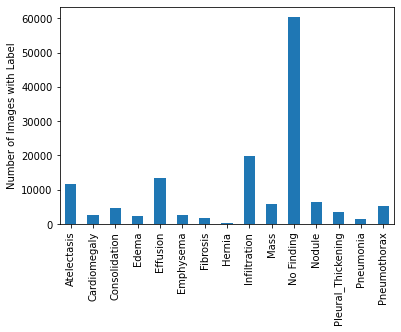

In [13]:
# Histogram of the different diagnosis
ax = all_xray_df[all_labels].sum().plot(kind='bar')
ax.set(ylabel = 'Number of Images with Label')

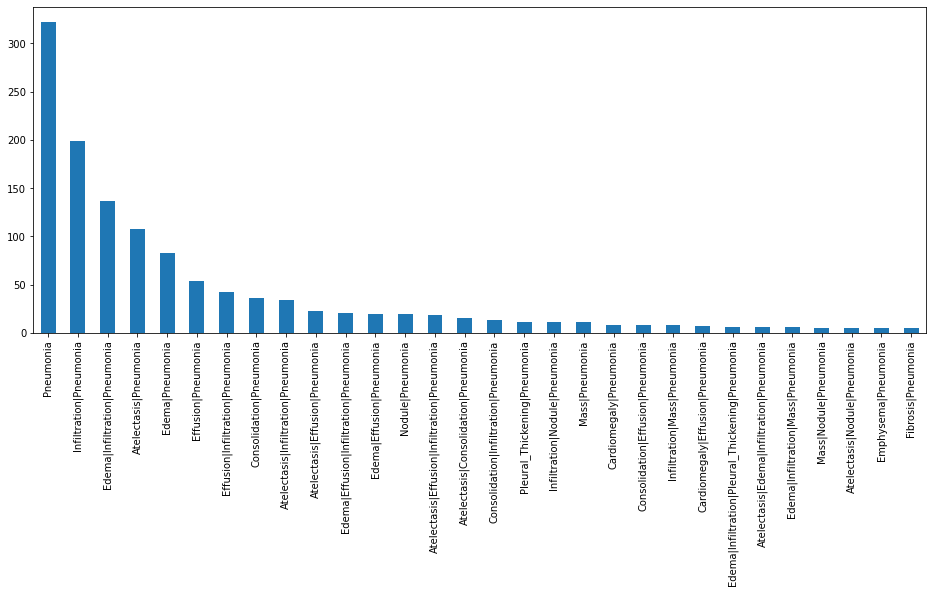

In [14]:
# Histogram of co-occurrences for Pneumonia
plt.figure(figsize=(16,6))
all_xray_df[all_xray_df.Pneumonia==1]['Finding Labels'].value_counts()[0:30].plot(kind='bar')

(array([4.1465e+04, 7.0265e+04, 3.7400e+02, 1.0000e+01, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 6.0000e+00]),
 array([  1. ,  42.3,  83.6, 124.9, 166.2, 207.5, 248.8, 290.1, 331.4,
        372.7, 414. ]),
 <a list of 10 Patch objects>)

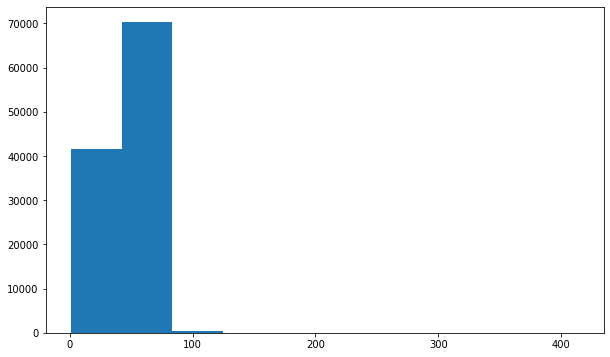

In [15]:
# Age distribution
plt.figure(figsize=(10,6))
plt.hist(all_xray_df['Patient Age'])

In [16]:
# Find images related to patients with age > 100
all_xray_df[all_xray_df['Patient Age']>117]

,Image Index,Finding Labels,Follow-up #,Patient ID,Patient Age,Patient Gender,View Position,OriginalImage[Width,Height],OriginalImagePixelSpacing[x,...,Emphysema,Fibrosis,Hernia,Infiltration,Mass,No Finding,Nodule,Pleural_Thickening,Pneumonia,Pneumothorax
20852,00005567_000.png,Effusion|Pneumonia,0,5567,412,M,AP,3056,2544,0.139,...,0,0,0,0,0,0,0,0,1,0
46965,00011973_002.png,Edema,2,11973,414,M,AP,3056,2544,0.139,...,0,0,0,0,0,0,0,0,0,0
48284,00012238_010.png,No Finding,10,12238,148,M,PA,2992,2991,0.143,...,0,0,0,0,0,1,0,0,0,0
55742,00013950_000.png,No Finding,0,13950,148,M,PA,2964,2939,0.143,...,0,0,0,0,0,1,0,0,0,0
58650,00014520_026.png,Infiltration|Mass,26,14520,150,M,PA,2992,2991,0.143,...,0,0,0,1,1,0,0,0,0,0
62929,00015558_000.png,No Finding,0,15558,149,M,PA,2992,2991,0.143,...,0,0,0,0,0,1,0,0,0,0
74884,00018366_044.png,Pneumothorax,44,18366,152,F,PA,2302,2991,0.143,...,0,0,0,0,0,0,0,0,0,1
78795,00019346_000.png,Infiltration,0,19346,151,F,PA,2678,2774,0.143,...,0,0,0,1,0,0,0,0,0,0
84810,00020900_002.png,No Finding,2,20900,411,M,AP,3056,2544,0.139,...,0,0,0,0,0,1,0,0,0,0
85404,00021047_002.png,Mass|Pleural_Thickening,2,21047,412,M,AP,3056,2544,0.139,...,0,0,0,0,1,0,0,1,0,0


In [17]:
all_xray_df.loc[all_xray_df['Patient Age'] > 117, 'Patient Age'] = float('nan')

/home/fanta/.local/virtualenv/python3/lib/python3.6/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/home/fanta/.local/virtualenv/python3/lib/python3.6/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


(array([ 1803.,  5021., 12798., 14580., 18664., 26481., 20790.,  9793.,
         1917.,   257.]),
 array([ 1. , 10.4, 19.8, 29.2, 38.6, 48. , 57.4, 66.8, 76.2, 85.6, 95. ]),
 <a list of 10 Patch objects>)

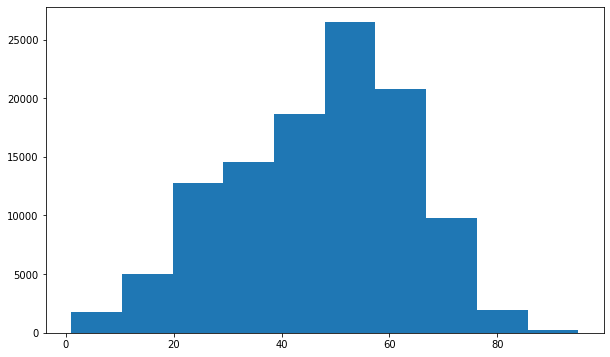

In [18]:
# Age distribution
plt.figure(figsize=(10,6))
plt.hist(all_xray_df['Patient Age'])

(array([ 41.,  85., 174., 203., 196., 243., 266., 175.,  39.,   8.]),
 array([ 2. , 10.8, 19.6, 28.4, 37.2, 46. , 54.8, 63.6, 72.4, 81.2, 90. ]),
 <a list of 10 Patch objects>)

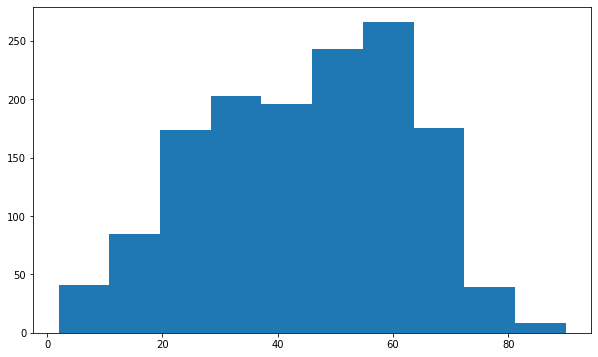

In [19]:
# Age distribution for patients with pneumonia
# Age distribution
plt.figure(figsize=(10,6))
plt.hist(all_xray_df[all_xray_df.Pneumonia==1]['Patient Age'])

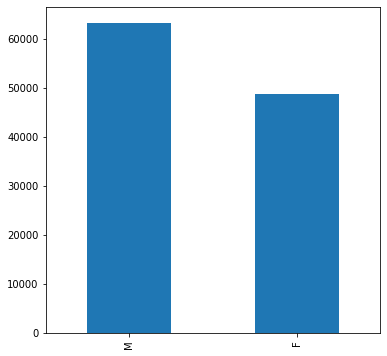

In [20]:
plt.figure(figsize=(6,6))
all_xray_df['Patient Gender'].value_counts().plot(kind='bar')

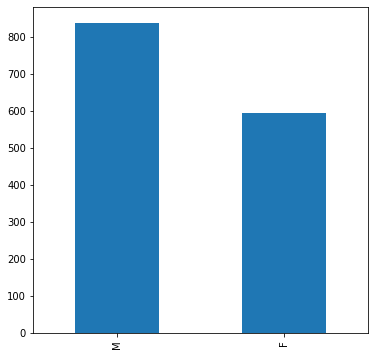

In [21]:
plt.figure(figsize=(6,6))
all_xray_df[all_xray_df.Pneumonia ==1]['Patient Gender'].value_counts().plot(kind='bar')

In [22]:
# How many of the images have been found with pneumonia.
sum(all_xray_df.Pneumonia)

1431

In [23]:
# Check min and max original images size
image_width, image_height = 'OriginalImage[Width','Height]'
spacing_x, spacing_y ='OriginalImagePixelSpacing[x', 'y]'

In [24]:
images_size = all_xray_df[image_width]*all_xray_df[image_height]
min(images_size), max(images_size)

(1167003, 13650909)

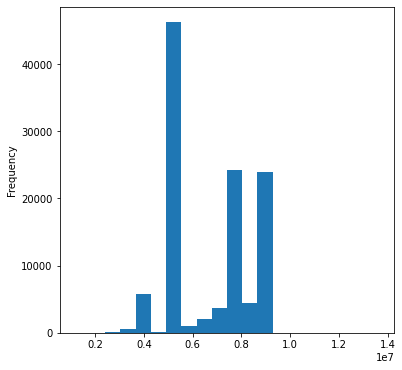

In [25]:
plt.figure(figsize=(6,6))
images_size.plot.hist(bins=20)

EDA is open-ended, and it is up to you to decide how to look at different ways to slice and dice your data. A good starting point is to look at the requirements for the FDA documentation in the final part of this project to guide (some) of the analyses you do. 

This EDA should also help to inform you of how pneumonia looks in the wild. E.g. what other types of diseases it's commonly found with, how often it is found, what ages it affects, etc. 

Note that this NIH dataset was not specifically acquired for pneumonia. So, while this is a representation of 'pneumonia in the wild,' the prevalence of pneumonia may be different if you were to take only chest x-rays that were acquired in an ER setting with suspicion of pneumonia. 

Also, **describe your findings and how will you set up the model training based on the findings.**

In [71]:
file_names = all_xray_df.path.sample(9).values

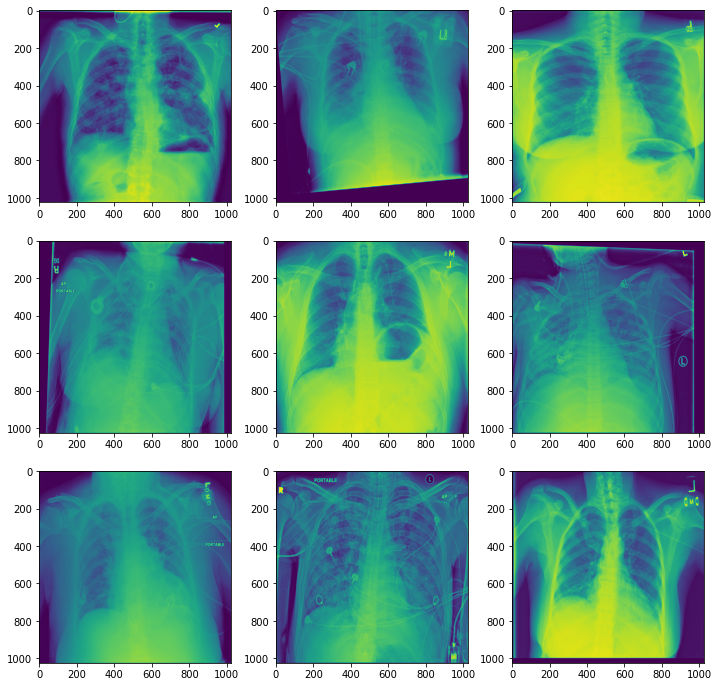

In [72]:
fig, axs = plt.subplots(3, 3, figsize=(12, 12))
i = 0
for row in range(3):
    for col in range(3):
        image = plt.imread(file_names[i])
        axs[row, col].imshow(image)
        i = i+1

In [58]:
all_xray_df['Patient Gender'].unique()

array(['M', 'F'], dtype=object)

In [81]:
all_xray_df[all_xray_df.Pneumonia==1]['View Position'].value_counts()

AP    801
PA    630
Name: View Position, dtype: int64

In [79]:
all_xray_df['View Position'].value_counts()

PA    67310
AP    44810
Name: View Position, dtype: int64